In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
train_df = pd.read_csv('social_theory_train.csv')
test_df = pd.read_csv('social_theory_test.csv')

train_df.head()

,neigbors,same_partition,diff_deg_cen,diff_eigen_cen,y
0,2,1,0.000097,6.199184e-09,1
1,3,1,0.000000,2.372001e-06,1
2,1,1,0.000737,9.013412e-05,1
3,11,1,-0.000013,-5.773385e-11,1
4,1,1,0.000071,5.126576e-09,1


In [4]:
x_train = train_df.drop('y', axis=1)
y_train = train_df['y']

x_test = test_df.drop('y', axis=1)
y_test = test_df['y']

<AxesSubplot:>

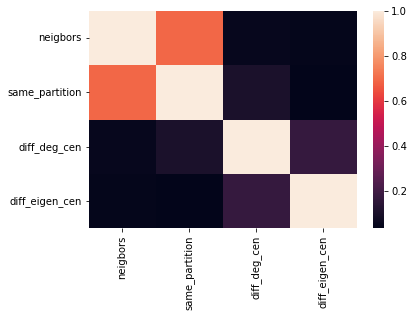

In [5]:
sns.heatmap(x_train.corr())

In [15]:
results = []

#I save the results for each features
for i in x_train.columns:
    res = []
    res.append(i)
    logr = LogisticRegression()
    #fit the model using just one metric
    logr.fit(x_train[i].values.reshape(-1, 1),y_train)
    #save the coefficient
    res.append(float(logr.coef_[0]))
    #save the accuracy
    res.append(accuracy_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    #save the F1 score
    res.append(f1_score(y_test, logr.predict(x_test[i].values.reshape(-1, 1))))
    results.append(res)

In [7]:
metrics_scores = pd.DataFrame(results, columns = ["Metric", "Coefficient", "Accuracy","F1-score"])

In [8]:
# how much it
metrics_scores

,Metric,Coefficient,Accuracy,F1-score
0,neigbors,7.912202,0.961460,0.959935
1,same_partition,7.450921,0.960745,0.959442
2,diff_deg_cen,1.000110,0.521716,0.361832
3,diff_eigen_cen,9.105345,0.507024,0.067339


# Fittiamo un Random Forest per sport

In [16]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier())], 
    verbose = True)

In [17]:
pipeline.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 1.1min


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())],
         verbose=True)

Text(0.5, 0, 'Random Forest Feature Importance')

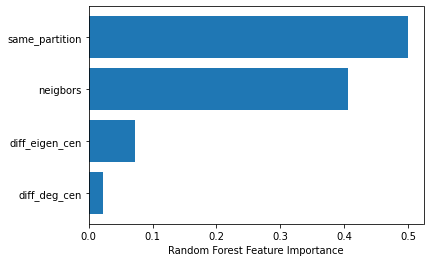

In [18]:
sorted_idx = pipeline["classifier"].feature_importances_.argsort()

plt.barh(x_train.columns[sorted_idx], pipeline["classifier"].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [19]:
print(f1_score(y_test, pipeline.predict(x_test)))

0.9658466485661953
